In [33]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [45]:
# Read CSV
unemployed_data_one = pd.read_csv("unemployment_2010-2015.csv")
unemployed_data_two = pd.read_csv("unemployment_2016-2020.csv")

# Merge our two data frames together
combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
combined_unemployed_data.head()

,Country Name,Country Code_x,2010,2011,2012,2013,2014,2015,Country Code_y,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,6.879694,6.730720,6.578243,6.480673,6.414462,6.468598,AFE,6.546351,6.523061,6.414392,6.472269,6.814177
1,Afghanistan,AFG,11.520000,11.510000,11.520000,11.540000,11.450000,11.390000,AFG,11.310000,11.180000,11.060000,10.980000,11.730000
2,Africa Western and Central,AFW,4.471161,4.466731,4.560139,4.356187,4.640632,4.547113,AFW,5.486480,5.927104,5.910615,5.928926,6.300105
3,Angola,AGO,9.430000,7.360000,7.370000,7.380000,7.310000,7.260000,AGO,7.200000,7.100000,7.000000,6.930000,7.700000
4,Albania,ALB,14.090000,13.480000,13.380000,15.870000,18.060000,17.190000,ALB,15.420000,13.620000,12.300000,11.470000,11.700000


In [46]:
# Delete the duplicate 'Country Code' column and rename the first one back to 'Country Code'
del combined_unemployed_data["Country Code_y"]
combined_unemployed_data = combined_unemployed_data.rename(columns={"Country Code_x": "Country Code"})
combined_unemployed_data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,6.879694,6.730720,6.578243,6.480673,6.414462,6.468598,6.546351,6.523061,6.414392,6.472269,6.814177
1,Afghanistan,AFG,11.520000,11.510000,11.520000,11.540000,11.450000,11.390000,11.310000,11.180000,11.060000,10.980000,11.730000
2,Africa Western and Central,AFW,4.471161,4.466731,4.560139,4.356187,4.640632,4.547113,5.486480,5.927104,5.910615,5.928926,6.300105
3,Angola,AGO,9.430000,7.360000,7.370000,7.380000,7.310000,7.260000,7.200000,7.100000,7.000000,6.930000,7.700000
4,Albania,ALB,14.090000,13.480000,13.380000,15.870000,18.060000,17.190000,15.420000,13.620000,12.300000,11.470000,11.700000


In [47]:
# Set the 'Country Code' to be our index for easy referencing of rows
combined_unemployed_data = combined_unemployed_data.set_index("Country Code")
combined_unemployed_data.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,,,
AFE,Africa Eastern and Southern,6.879694,6.730720,6.578243,6.480673,6.414462,6.468598,6.546351,6.523061,6.414392,6.472269,6.814177
AFG,Afghanistan,11.520000,11.510000,11.520000,11.540000,11.450000,11.390000,11.310000,11.180000,11.060000,10.980000,11.730000
AFW,Africa Western and Central,4.471161,4.466731,4.560139,4.356187,4.640632,4.547113,5.486480,5.927104,5.910615,5.928926,6.300105
AGO,Angola,9.430000,7.360000,7.370000,7.380000,7.310000,7.260000,7.200000,7.100000,7.000000,6.930000,7.700000
ALB,Albania,14.090000,13.480000,13.380000,15.870000,18.060000,17.190000,15.420000,13.620000,12.300000,11.470000,11.700000


In [56]:
# Collect the mean unemployment rates for the world
combined_unemployed_data["Mean Unemployment"] = combined_unemployed_data.select_dtypes(include=np.number).mean(axis=1)
combined_unemployed_data.head()


,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Mean Unemployment
Country Code,,,,,,,,,,,,,
AFE,Africa Eastern and Southern,6.879694,6.730720,6.578243,6.480673,6.414462,6.468598,6.546351,6.523061,6.414392,6.472269,6.814177,6.574785
AFG,Afghanistan,11.520000,11.510000,11.520000,11.540000,11.450000,11.390000,11.310000,11.180000,11.060000,10.980000,11.730000,11.380909
AFW,Africa Western and Central,4.471161,4.466731,4.560139,4.356187,4.640632,4.547113,5.486480,5.927104,5.910615,5.928926,6.300105,5.145018
AGO,Angola,9.430000,7.360000,7.370000,7.380000,7.310000,7.260000,7.200000,7.100000,7.000000,6.930000,7.700000,7.458182
ALB,Albania,14.090000,13.480000,13.380000,15.870000,18.060000,17.190000,15.420000,13.620000,12.300000,11.470000,11.700000,14.234545


In [57]:
# Collect the years where data was collected
year_names = combined_unemployed_data.select_dtypes(include=np.number).keys()
year_names = year_names.tolist()
year_names = year_names[0:11]
print(year_names)

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


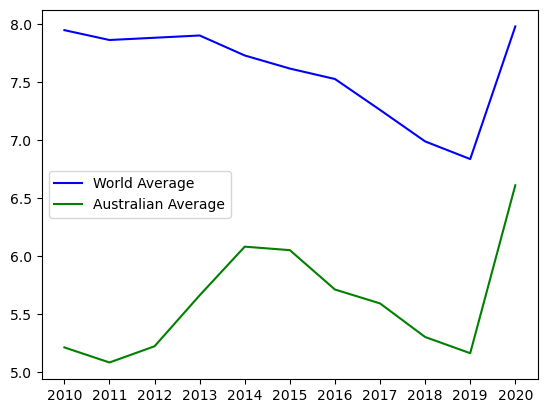

In [104]:
# Plot the world average as a line chart
world_unemployment = combined_unemployed_data.iloc[:, 1:12].mean()
avg_unemployment_world = plt.plot(year_names, world_unemployment, color="blue", label="World Average")

# Plot the unemployment values for a single country
aus = combined_unemployed_data.loc[combined_unemployed_data["Country Name"] == "Australia", :]
unemployment_aus = aus.iloc[:, 1:12].transpose()
avg_unemployment_aus = plt.plot(year_names, unemployment_aus, color="green", label="Australian Average")

# Create a legend for our chart
plt.legend(loc="best")

# Show the chart
plt.savefig("Unemployment_Worldwide_vs_Australia.png")
plt.show()


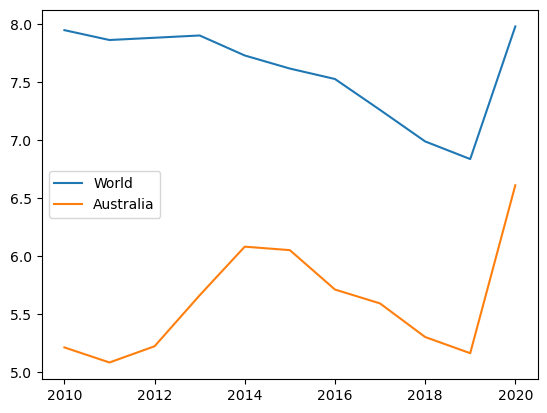

In [111]:
# Create the same plot using Pandas built in plot method
world_avg = world_unemployment.tolist()
aus_avg = unemployment_aus["AUS"].tolist()

plot_data = pd.DataFrame({
    "World": world_avg,     
    "Australia": aus_avg
     }, index=year_names)

lines = plot_data.plot.line()
fig = lines.figure
fig.savefig("World_vs_Australia_Unemployment_PD.png")
